# Transformation of Features

Why Transformation of Features Are Required?<br>

1. Linear Regression---Gradient Descent ----Global Minima<br><br>
2. Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance<br>

Every Point has some vectors and Direction<br>

Deep Learning Techniques(Standardization, Scaling)<br>
1.ANN--->GLobal Minima, Gradient<br>
2.CNN<br>
3.RNN<br>

0-255 pixels

## Types Of Transformation
1. Normalization And Standardization
2. Scaling to Minimum And Maximum values
3. Scaling To Median And Quantiles
4. Guassian Transformation: (When data is not in normal/gaussian distribution)<br> 
   4(a) Logarithmic Transformation<br>
   4(b) Reciprocal Trnasformation<br>
   4(c) Square Root Transformation<br>
   4(d) Exponential Trnasformation<br>
   4(e) Box Cox Transformation<br>

# 1.Standardization(Why standardization?)
Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
z=(x-x_mean)/std

In [1]:
import pandas as pd
df=pd.read_csv('titanic_train.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [2]:
#replac NaN values with median
df['Age'].fillna(df.Age.median(),inplace=True)

In [3]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### (i) TRANSFORMING THE WHOLE DATASET FOR VISUALIZATION PURPOSE

In [4]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
df_scaled=scaling.fit_transform(df)

In [5]:
pd.DataFrame(df_scaled)

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df_scaled

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

Text(0.5, 1.0, 'P Class Before Scaled')

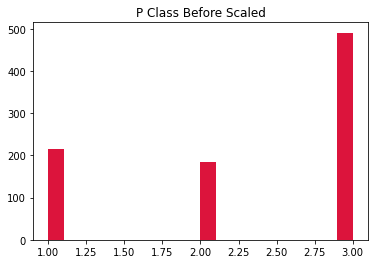

In [8]:
plt.hist(df['Pclass'],bins=20,color='crimson')     #For Age feature
plt.title('P Class Before Scaled')

Text(0.5, 1.0, 'P Class After Scaled')

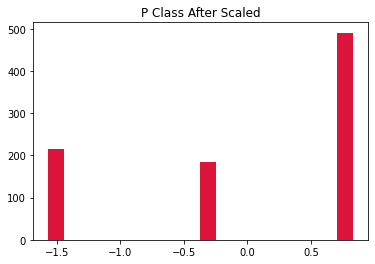

In [9]:
plt.hist(df_scaled[:,1],bins=20,color='crimson')  #For  Pclass
plt.title('P Class After Scaled')

Text(0.5, 1.0, 'Age Before Scaled')

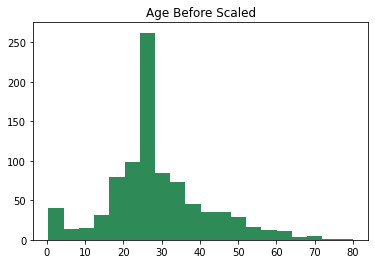

In [10]:
plt.hist(df['Age'],bins=20,color='seagreen')     #For Age feature
plt.title('Age Before Scaled')

Text(0.5, 1.0, 'Age After Scaled')

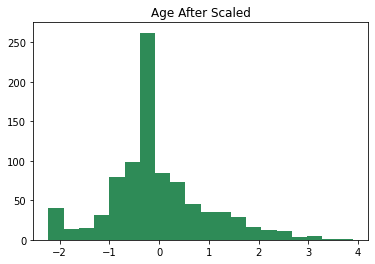

In [11]:
plt.hist(df_scaled[:,2],bins=20,color='seagreen')     #For Age feature
plt.title('Age After Scaled')

Text(0.5, 1.0, 'Fare Before Scaled')

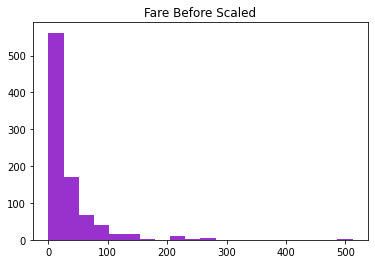

In [12]:
plt.hist(df['Fare'],bins=20,color='darkorchid')   # Original fare DataFrame(not scaled)
plt.title('Fare Before Scaled')

Text(0.5, 1.0, 'Fare After Scaled')

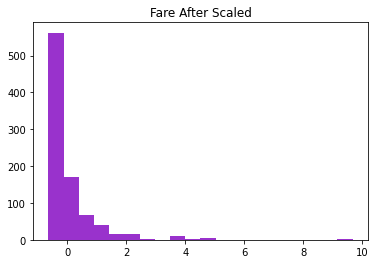

In [13]:
plt.hist(df_scaled[:,3],bins=20,color='darkorchid')     # For fare feature
plt.title('Fare After Scaled')

## (ii) For Model Purpose

In [14]:
#Separating the independent and dependent features
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
x # Printing the x  # Independent Data

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


In [16]:
y #Dependent data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [18]:
x_train # Printing the  Independent Training Data

,Pclass,Age,Fare
6,1,54.0,51.8625
718,3,28.0,15.5000
685,2,25.0,41.5792
73,3,26.0,14.4542
882,3,22.0,10.5167
...,...,...,...
106,3,21.0,7.6500
270,1,28.0,31.0000
860,3,41.0,14.1083
435,1,14.0,120.0000


In [19]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler

In [20]:
### fit vs fit_transform
#fit is used to give data to machine algorithm without any change.
#fit_transform modifies the data and then gives it to the machine algorithm.
scaler=StandardScaler()
x_train_scaled=pd.DataFrame(scaler.fit_transform(x_train),columns=['Pclass','Age','Fare'])

In [21]:
x_train_scaled

,Pclass,Age,Fare
0,-1.625803,1.913493,0.387842
1,0.805762,-0.094520,-0.319081
2,-0.410021,-0.326214,0.187924
3,0.805762,-0.248983,-0.339412
4,0.805762,-0.557908,-0.415961
...,...,...,...
591,0.805762,-0.635139,-0.471692
592,-1.625803,-0.094520,-0.017745
593,0.805762,0.909486,-0.346137
594,-1.625803,-1.175758,1.712501


In [22]:
# scaling the x_test data
x_test_scaled=scaler.transform(x_test)

In [23]:
x_test_scaled

array([[ 0.80576177, -0.09452019, -0.32402243],
       [-0.41002054,  0.13717363, -0.4162854 ],
       [ 0.80576177, -0.71237038, -0.46634591],
       [-0.41002054, -1.79360821,  0.0211365 ],
       [ 0.80576177, -1.17575802, -0.40186603],
       [-1.62580285, -0.24898274,  0.91250512],
       [ 0.80576177, -0.09452019, -0.46974808],
       [ 0.80576177, -1.02129548, -0.2704781 ],
       [ 0.80576177, -1.02129548, -0.46974808],
       [-1.62580285, -0.78960166, -0.10944269],
       [-1.62580285,  0.60056127,  0.41190006],
       [ 0.80576177,  1.14118018, -0.46391578],
       [ 0.80576177, -0.09452019, -0.12531819],
       [ 0.80576177,  0.05994235, -0.47995459],
       [-0.41002054,  0.52332999, -0.36768297],
       [-1.62580285, -1.02129548,  0.14555873],
       [-1.62580285,  0.98671764,  0.40128918],
       [ 0.80576177, -0.09452019, -0.46820835],
       [-0.41002054, -0.17175147, -0.36768297],
       [-1.62580285,  1.372874  ,  0.39051499],
       [ 0.80576177, -0.40344529, -0.466

In [24]:
### Model Building
## fit() for training and predict for test

### Algorithm starts :

In [25]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

In [26]:
classification.fit(x_train_scaled,y_train)

LogisticRegression()

In [27]:
pred=classification.predict(x_test_scaled) #Machine prediction on testing data

In [28]:
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
#Printing the classification report

from sklearn import metrics
print(metrics.classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       218
           1       0.47      0.74      0.58        77

    accuracy                           0.72       295
   macro avg       0.68      0.73      0.68       295
weighted avg       0.78      0.72      0.73       295

